# CODE 6-8

## EXPLORATORY DATA ANALYSIS PROCESS

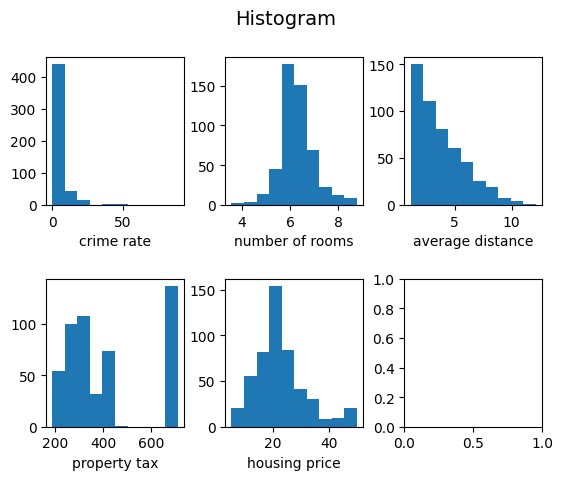

In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

df = pd.read_csv('../data/BostonHousing.csv')
df = df[['crim','rm','dis', 'tax','medv']]
df

titles = ['crime rate', 'number of rooms', 'average distance', 'property tax', 'housing price']

grp = pd.Series(['M' for i in range(len(df))])
grp.loc[df.medv >= 25.0] = 'H'
grp.loc[df.medv <= 17.0] = 'L'

df['grp'] = grp

new_ord = ['H', 'M', 'L']
new_dtype = CategoricalDtype(categories=new_ord, ordered=True)
df.grp = df.grp.astype(new_dtype)
df.grp.dtype


fig, axes = plt.subplots(nrows=2, ncols=3)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(5):
    df[df.columns[i]].plot.hist(ax=axes[i//3, i%3], ylabel='', xlabel=titles[i])
    
fig.suptitle('Histogram', fontsize=14)

plt.show()



In [41]:
df.head()

,crim,rm,dis,tax,medv,grp
0,0.00632,6.575,4.0900,296,24.0,M
1,0.02731,6.421,4.9671,242,21.6,M
2,0.02729,7.185,4.9671,242,34.7,H
3,0.03237,6.998,6.0622,222,33.4,H
4,0.06905,7.147,6.0622,222,36.2,H


In [42]:
df.shape

(506, 6)

In [43]:
df.dtypes

crim     float64
rm       float64
dis      float64
tax        int64
medv     float64
grp     category
dtype: object

## BOX PLOT

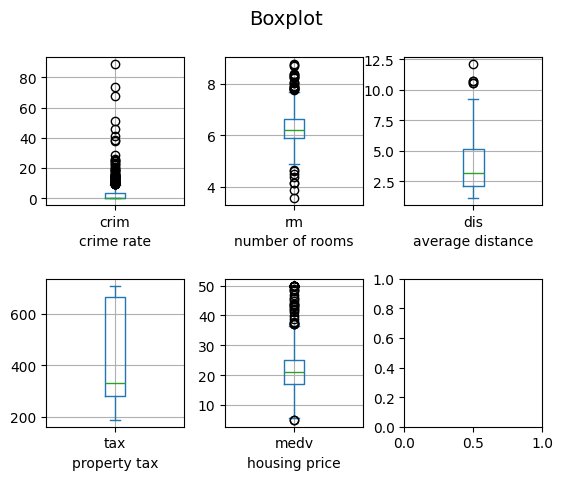

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(5):
    df[df.columns[i]].plot.box(ax=axes[i//3, i%3], ylabel='', xlabel=titles[i], grid=True)

fig.suptitle('Boxplot', fontsize=14)

plt.show()


## MODIFICATIONS

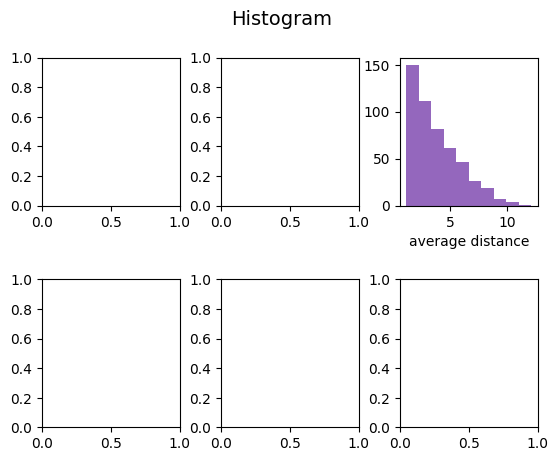

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(5):
    df[df.columns[2]].plot.hist(ax=axes[0,2], ylabel='', xlabel=titles[2])
    
fig.suptitle('Histogram', fontsize=14)

plt.show()

## SCATTER PLOT

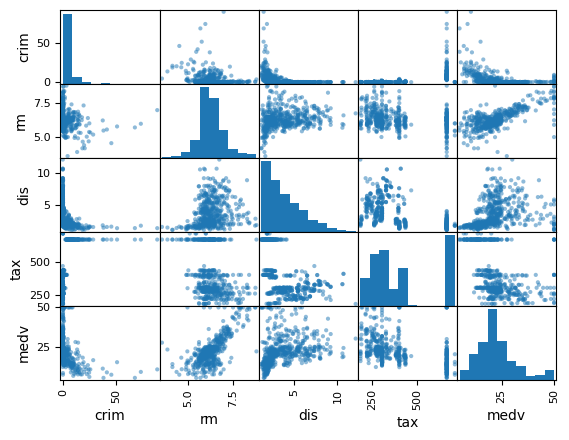

In [46]:
pd.plotting.scatter_matrix(df.iloc[:, :5])
plt.show()

## CORRELATION COEFFICIENT

In [47]:
df.iloc[:, :5].corr() # pearman

,crim,rm,dis,tax,medv
crim,1.000000,-0.219247,-0.379670,0.582764,-0.388305
rm,-0.219247,1.000000,0.205246,-0.292048,0.695360
dis,-0.379670,0.205246,1.000000,-0.534432,0.249929
tax,0.582764,-0.292048,-0.534432,1.000000,-0.468536
medv,-0.388305,0.695360,0.249929,-0.468536,1.000000
